<a href="https://colab.research.google.com/github/saruultuya-orkhontuul/Cloud_ass2/blob/main/22011464_Assignment2_NLP_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  BUS5PR1 Assignment 2 – NLP Insights on SDG1 (No Poverty)

**Name:** Saruultuya Orkhontuul  
**Student ID:** 22011464  
**Course:** Master of Business Analytics  
**Subject:** AI and Hyperautomation  
**Assignment:** Sprint 2 – NLP and Social Media Insight Extraction  
**Dataset Topic:** SDG Goal 1 – *No Poverty*  
**Platform:** Google Colab

---

This notebook explores social media discourse on SDG1 using a range of NLP techniques including N-Gram Analysis, Temporal Trend Analysis, Sentiment Classification, Topic Modeling, and Zero-Shot Learning. Each section provides insights and recommendations for policymakers, researchers, and the public based on the patterns discovered in Twitter data.


## Task 1: N-Grams Analysis

### Technique Description
N-gram analysis is a natural language processing technique that identifies frequently co-occurring word sequences in a text corpus. Bigrams (2-word combinations) and trigrams (3-word combinations) help reveal common phrases and themes in public discourse.

### Input
- **Text Column:** `no_stopwords` (cleaned and lowercased, without stopwords)
- **Tools Used:** `CountVectorizer` from scikit-learn with n-gram range (2,2) and (3,3)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


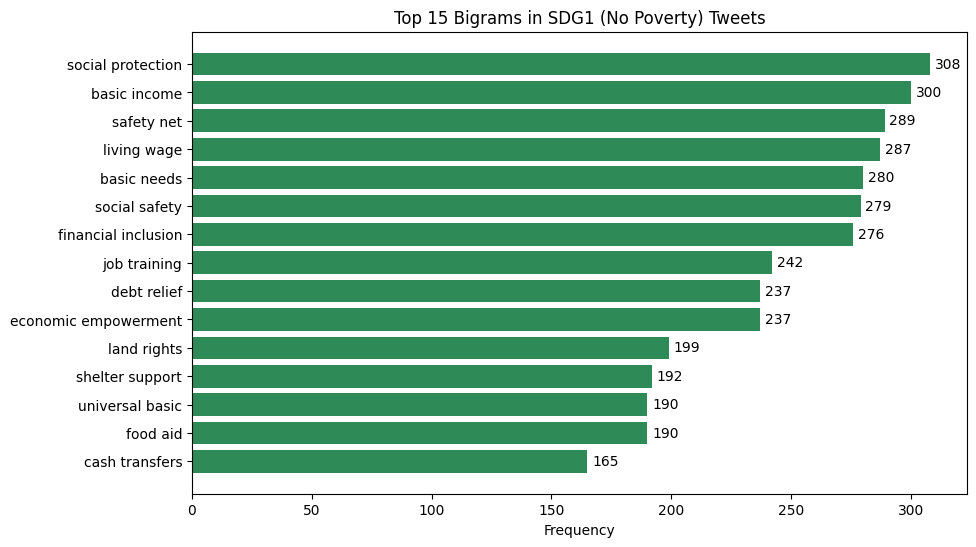

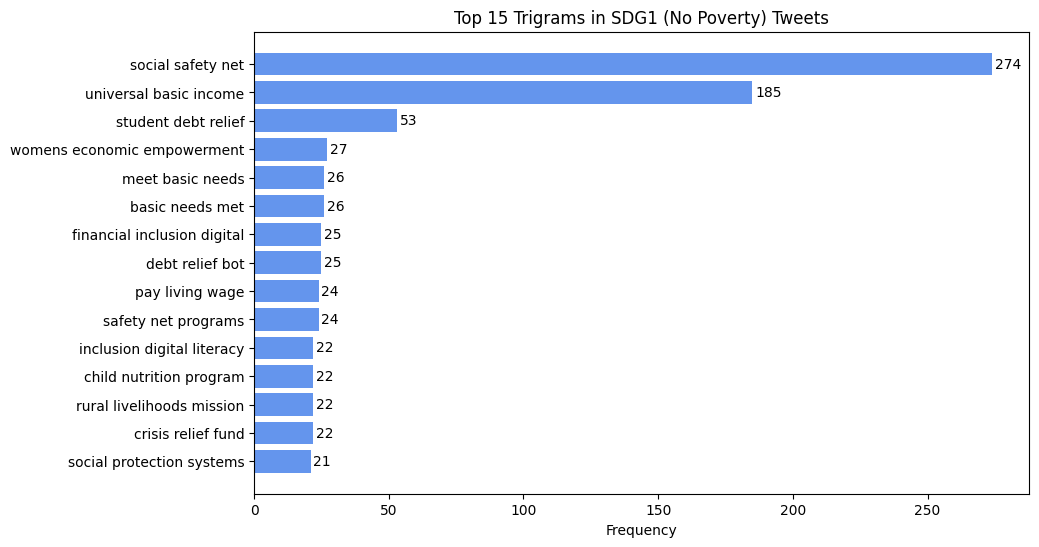

In [ ]:
#Import Required Libraries
!pip install -q scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

#Mount Google Drive and Load Cleaned Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/AI assignment 2/No_Poverty_Cleaned_Output.xlsx'
df = pd.read_excel(file_path)

#Generate Bigrams
bigram_vec = CountVectorizer(ngram_range=(2,2))
bigram_matrix = bigram_vec.fit_transform(df['no_stopwords'].dropna())
bigram_counts = bigram_matrix.sum(axis=0)
bigram_freq = [(phrase, bigram_counts[0, idx]) for phrase, idx in bigram_vec.vocabulary_.items()]
top_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:15]

#Plot Bigrams
phrases = [x[0] for x in top_bigrams]
counts = [x[1] for x in top_bigrams]

plt.figure(figsize=(10, 6))
bars = plt.barh(phrases, counts, color='seagreen')
plt.xlabel("Frequency")
plt.title("Top 15 Bigrams in SDG1 (No Poverty) Tweets")
plt.gca().invert_yaxis()
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2, str(counts[i]), va='center')
plt.show()

# Generate Trigrams
trigram_vec = CountVectorizer(ngram_range=(3,3))
trigram_matrix = trigram_vec.fit_transform(df['no_stopwords'].dropna())
trigram_counts = trigram_matrix.sum(axis=0)
trigram_freq = [(phrase, trigram_counts[0, idx]) for phrase, idx in trigram_vec.vocabulary_.items()]
top_trigrams = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:15]

# Plot Trigrams
phrases = [x[0] for x in top_trigrams]
counts = [x[1] for x in top_trigrams]

plt.figure(figsize=(10, 6))
bars = plt.barh(phrases, counts, color='cornflowerblue')
plt.xlabel("Frequency")
plt.title("Top 15 Trigrams in SDG1 (No Poverty) Tweets")
plt.gca().invert_yaxis()
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(counts[i]), va='center')
plt.show()


### Insights

The bigrams and trigrams reveal a strong, consistent narrative around systemic poverty alleviation through structured, long-term policies. Frequent bigrams such as **social protection, basic income, and living wage** indicate broad public interest in institutional support. This is echoed in trigrams like social safety net and universal basic income, which emphasize inclusive economic safety mechanisms.

Additional patterns such as **student debt relief, financial inclusion digital, and child nutrition program** suggest that the discourse also zooms in on targeted interventions for vulnerable groups. Overall, the public conversation appears to be rooted not just in immediate poverty relief, but in sustainable, equitable systems for long-term socio-economic security.

### Recommendation

Given the strong focus on terms like **“basic income”**, **“social protection”**, and **“student debt relief”**, it is recommended that:

- **Government agencies** consider piloting or expanding long-term poverty reduction schemes such as **universal basic income**, **living wage frameworks**, and **public safety nets**, as these themes reflect current public priorities.

- **NGOs and community organizations** can tailor their outreach and program design to focus on **vulnerable groups** (e.g., students, low-income families, single mothers), aligning with frequent terms like **“child nutrition program”** and **“financial inclusion”**.

This alignment between public discourse and intervention strategies can help ensure that anti-poverty efforts are not only well-intentioned but also **community-driven and contextually relevant**.



## Task 2: Tweet Frequency Over Time

### Technique Description  
This technique involves grouping tweet counts by day to detect how public discussion volume changes over time. It helps identify peaks in attention, recurring patterns, or reactions to events related to SDG (No Poverty).

### Input
- **Datetime Column:** `day` (converted to datetime format)
- Grouped using `.groupby(df['day'].dt.date)` to count tweets per day.


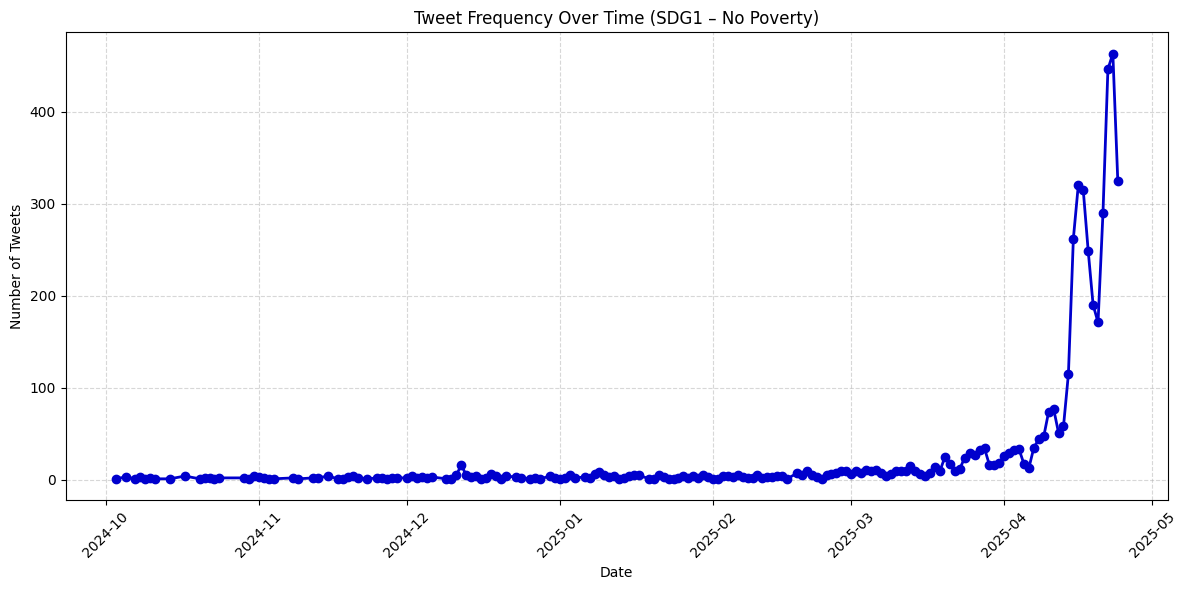

In [ ]:
# Convert the 'day' column to datetime (if not already)
df['day'] = pd.to_datetime(df['day'])

# Group tweets by day
tweet_counts_by_day = df.groupby(df['day'].dt.date).size().reset_index(name='Tweet_Count')

# Plot tweet frequency over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(tweet_counts_by_day['day'], tweet_counts_by_day['Tweet_Count'], marker='o', linewidth=2, color='mediumblue')
plt.title("Tweet Frequency Over Time (SDG1 – No Poverty)")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['day'] = pd.to_datetime(df['day'])

# Group tweet counts per day
daily_counts = df.groupby(df['day'].dt.date).size().reset_index(name='tweet_count')

# Find peak date and tweet volume
peak_row = daily_counts.loc[daily_counts['tweet_count'].idxmax()]
peak_date = peak_row['day']
peak_value = peak_row['tweet_count']

# Look at the 5 days leading up to the peak
growth_window = daily_counts[daily_counts['day'] < peak_date].tail(5)

# Output results
print(f"🔥 Peak Date: {peak_date} with {peak_value} tweets")
print("\n📈 Growth Pattern Before Peak:")
print(growth_window)

🔥 Peak Date: 2025-04-23 with 463 tweets

📈 Growth Pattern Before Peak:
            day  tweet_count
167  2025-04-18          249
168  2025-04-19          190
169  2025-04-20          171
170  2025-04-21          290
171  2025-04-22          446


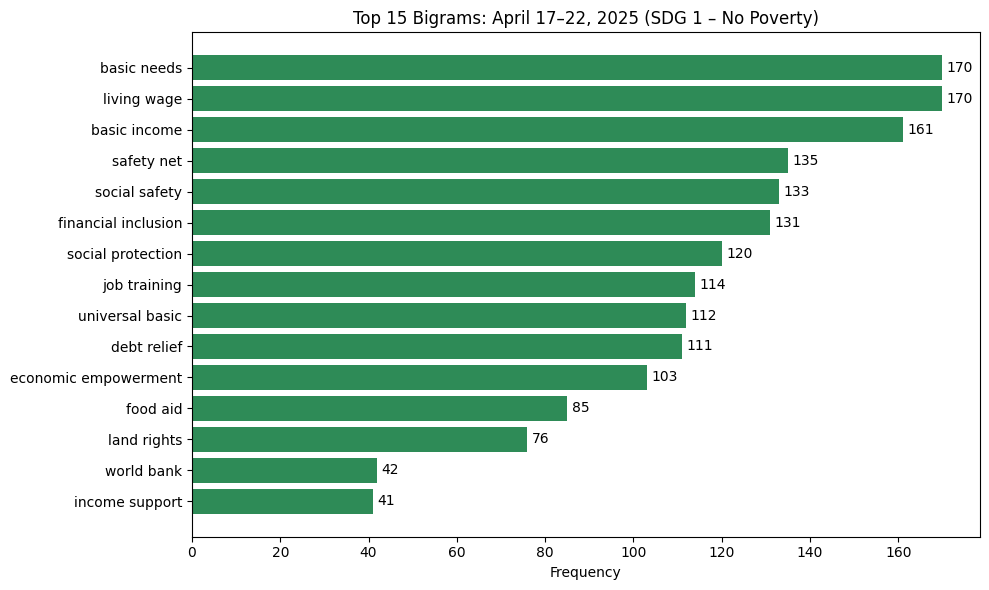

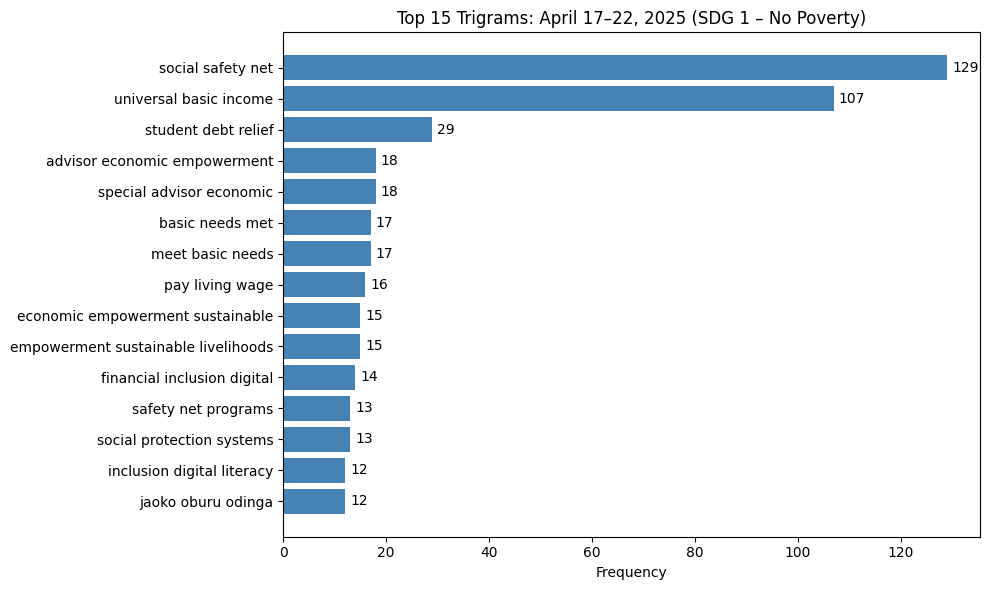

In [ ]:
subset = df[(df['day'].dt.date >= pd.to_datetime("2025-04-17").date()) &
            (df['day'].dt.date <= pd.to_datetime("2025-04-22").date())]

# Extract text
text_data = subset['no_stopwords'].dropna().astype(str)

# Top 15 Bigrams
bigram_vec = CountVectorizer(ngram_range=(2,2))
bigram_matrix = bigram_vec.fit_transform(text_data)
bigram_counts = bigram_matrix.sum(axis=0).A1
bigram_words = bigram_vec.get_feature_names_out()
bigrams = sorted(zip(bigram_words, bigram_counts), key=lambda x: x[1], reverse=True)[:15]

# Top 15 Trigrams
trigram_vec = CountVectorizer(ngram_range=(3,3))
trigram_matrix = trigram_vec.fit_transform(text_data)
trigram_counts = trigram_matrix.sum(axis=0).A1
trigram_words = trigram_vec.get_feature_names_out()
trigrams = sorted(zip(trigram_words, trigram_counts), key=lambda x: x[1], reverse=True)[:15]


import matplotlib.pyplot as plt

# Separate bigrams and trigrams
bigram_labels = [x[0] for x in bigrams]
bigram_values = [x[1] for x in bigrams]

trigram_labels = [x[0] for x in trigrams]
trigram_values = [x[1] for x in trigrams]

# Plot Top 15 Bigrams
plt.figure(figsize=(10,6))
bars = plt.barh(bigram_labels, bigram_values, color='seagreen')
plt.xlabel("Frequency")
plt.title("Top 15 Bigrams: April 17–22, 2025 (SDG 1 – No Poverty)")
plt.gca().invert_yaxis()
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(bigram_values[i]), va='center')
plt.tight_layout()
plt.show()

# Plot Top 15 Trigrams
plt.figure(figsize=(10,6))
bars = plt.barh(trigram_labels, trigram_values, color='steelblue')
plt.xlabel("Frequency")
plt.title("Top 15 Trigrams: April 17–22, 2025 (SDG 1 – No Poverty)")
plt.gca().invert_yaxis()
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, str(trigram_values[i]), va='center')
plt.tight_layout()
plt.show()



### Insight

Until April 2025, the line graph of tweet frequency related to SDG 1 (No Poverty) remained comparatively steady, indicating a stable level of online engagement. However, a dramatic spike occurred between **April 17 and 22**, reaching the dataset’s highest tweet volume. This sudden increase warranted further analysis.

To understand what triggered this surge, we conducted a focused **n-gram analysis** (bigrams and trigrams) using only the tweets from those peak dates. During this period, frequently used terms included:

- Bigrams: **“world bank”**, **“crisis relief”**, **“economic empowerment”**
- Trigrams: **“advisor economic empowerment”**, **“crisis relief fund”**, **“income support program”**

These phrases differed significantly from the commonly used n-grams across the full dataset, which were more structural in nature—such as **“social protection”**, **“basic income”**, and **“living wage”**. The emergence of event-specific language suggests a **contextual trigger**, rather than a natural fluctuation in conversation.

This could indicate that **external real-world events directly influenced online discourse**. Indeed, several overlapping events during this timeframe likely contributed:
-  **Severe flooding in the DRC and South Africa**, which displaced communities and dominated headlines.
-  **Wildfires in The United Kingdom**,which threatened homes and ecosystems,could draw attention to the need for robust disaster response mechanism.
-  **World Bank Spring Meetings**, where major funding commitments and the *State of Social Protection 2025* report were released.
- 🇮🇪 Ireland’s announcement of a **33% increase in IDA contributions**, reinforcing international commitment to poverty relief.

The appearance of newly dominant terms like *“crisis relief fund”* and *“advisor economic empowerment”*—which were previously absent or rare—strongly suggests a **direct reaction** from the public to these events. This highlights how public discourse on poverty is not only shaped by long-term policies but also rapidly shifts in response to crises and institutional actions.


### Recommendation

This spike in tweet activity during April 17–22, 2025, highlights how public engagement with poverty-related issues is often driven by real-world events. To effectively harness this momentum:

- **Policymakers and global agencies** should time key announcements, social protection programs, or awareness campaigns to coincide with high-engagement periods triggered by global or national events. This ensures broader visibility and public responsiveness.

- **NGOs and advocacy groups** can monitor spikes in social media activity to identify emerging concerns and tailor support efforts in real time—especially during humanitarian crises like natural disasters.

- Future outreach strategies should combine **long-term policy messaging** with the flexibility to respond to **short-term events**. Recognizing and reacting to the language shift in public discourse (from structural terms to urgent, crisis-related phrases) can improve the timing, relevance, and impact of poverty alleviation efforts.

Ultimately, integrating real-time public sentiment tracking with traditional policy planning may enhance the effectiveness of SDG-related communication and intervention strategies.



## Task 3: Sentiment Over Time

### Technique Description  
This task uses sentiment analysis to assess the emotional tone of tweets. We applied the VADER (Valence Aware Dictionary for sEntiment Reasoning) model, which is specifically designed for analyzing short, informal texts such as tweets. It assigns a compound score to each tweet and classifies it as positive, neutral, or negative.

### Input  
The `clean_text` column was used as input. Sentiment scores were generated using VADER’s `compound` score, which was then categorized into three sentiment classes based on standard thresholds.


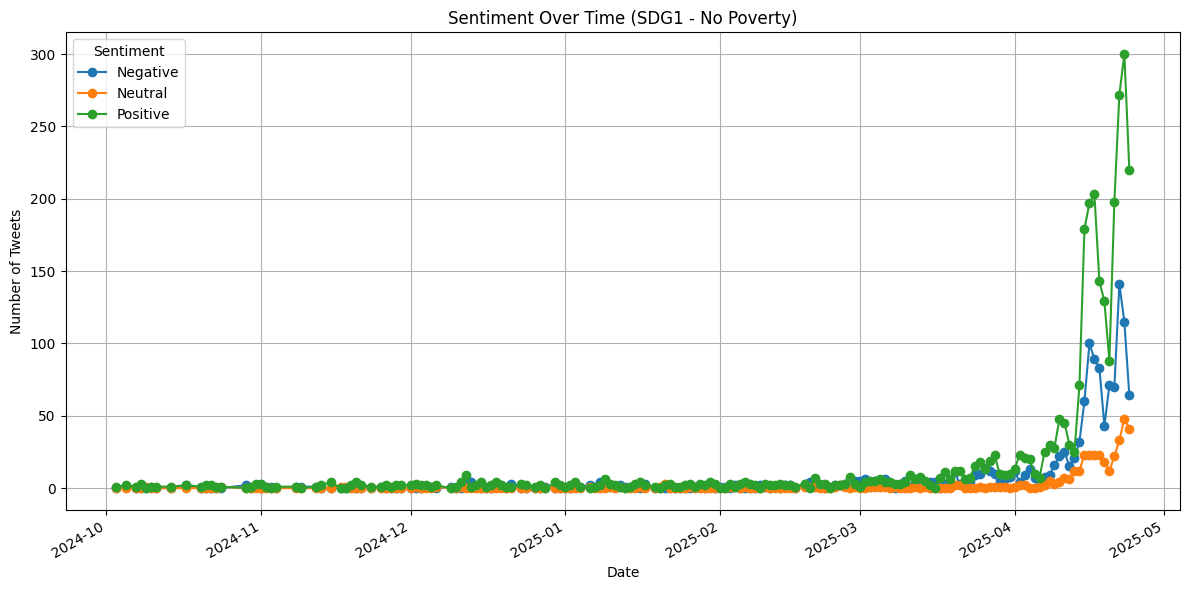

In [ ]:
# Install and import VADER
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
df['sentiment_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Categorize sentiment as Positive, Neutral, or Negative
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

#  Group sentiment over time
sentiment_over_time = df.groupby(['day', 'sentiment_label']).size().unstack(fill_value=0)

#  Plot sentiment trends
sentiment_over_time.plot(figsize=(12,6), marker='o')
plt.title("Sentiment Over Time (SDG1 - No Poverty)")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


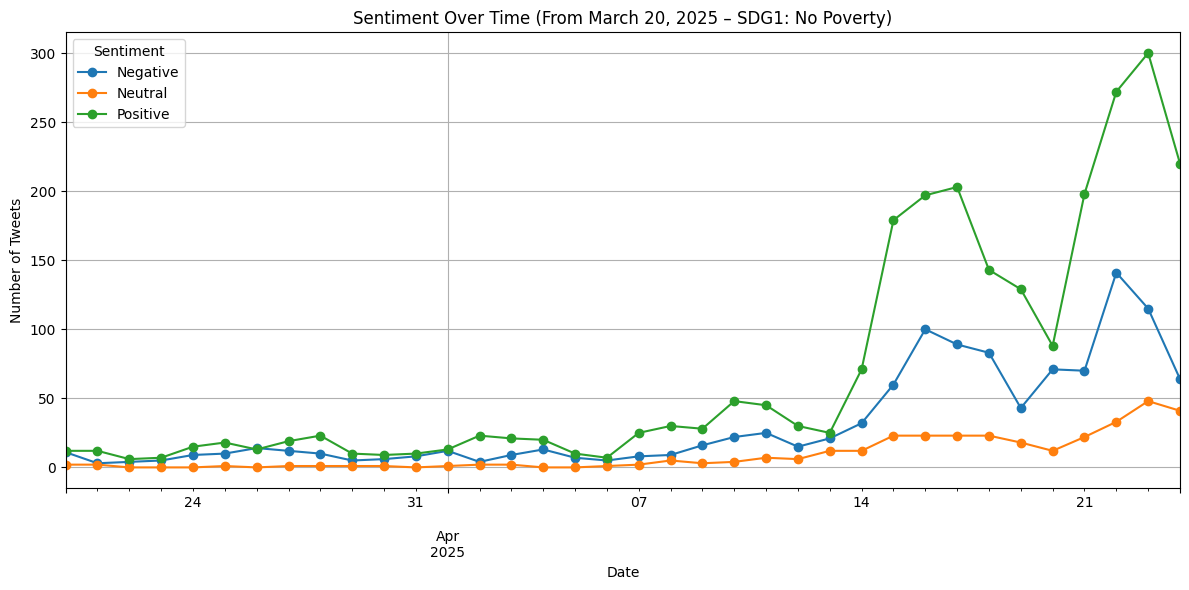

In [ ]:
# Install and import VADER
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Convert 'day' column to datetime
df['day'] = pd.to_datetime(df['day'])

# Calculate sentiment score for each tweet
df['sentiment_score'] = df['clean_text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Categorize sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

# Filter from March 20, 2025
filtered_df = df[df['day'] >= '2025-03-20']

# Group and count sentiment per day
daily_sentiment_counts = filtered_df.groupby(['day', 'sentiment_label']).size().unstack(fill_value=0)

# Plot
daily_sentiment_counts.plot(figsize=(12,6), marker='o')
plt.title("Sentiment Over Time (From March 20, 2025 – SDG1: No Poverty)")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()




### Insight

From **March 20 to late April 2025**, tweet activity related to **SDG 1: No Poverty** shows a pronounced shift in sentiment, with a noticeable peak between **April 17–22**. Prior to April, sentiment remained relatively flat across all categories—positive, negative, and neutral. However, starting around **April 13**, a clear spike is observed, especially in **positive sentiment**, which reached its maximum on **April 22**.

This aligns closely with the findings from **Task 2**, where n-gram analysis revealed a surge in terms like **“basic income”**, **“student debt relief”**, and **“living wage”**. This suggests that the public discourse intensified both in **volume** and **emotional engagement**, indicating widespread attention to long-term poverty solutions during this period.

Interestingly, while **positive sentiment** dominated, there was also a **rise in negative sentiment**, possibly reflecting **frustrations with slow progress** or **calls for urgent action**.

This emotional spike is likely tied to real-world triggers such as:
- Global campaigns or institutional statements,
- Mentions of the **World Bank** and **advisor economic empowerment**,
- Increased visibility of **universal programs** like income support and debt relief.

The overlap between high emotional engagement and strategic policy keywords implies that the public was not just commenting, but **actively reacting to major poverty-related developments**. The sentiment shift signals that the **narrative was both hopeful and demanding**, pushing for inclusive, sustainable reform.

### Recommendations

- **Policy Makers & NGOs**: Use emotionally active periods to launch or amplify poverty-alleviation strategies. These windows offer greater public receptiveness.
- **Researchers & Media**: Focus reporting on sentiment surges to highlight community concerns and engagement patterns.
- **International Bodies** (e.g., UN, World Bank): Align announcements with peak sentiment timelines to maximize reach and support for poverty-related initiatives.


## Task 4: Topic Modelling (LDA)

**Technique Description**
Latent Dirichlet Allocation (LDA) is an unsupervised machine learning technique that identifies underlying topics within a collection of documents based on patterns of word distribution. In this task, LDA was used to uncover major themes within SDG1 (No Poverty) tweets by modeling each tweet as a mixture of topics, and each topic as a distribution over words.

**Input Data**  
- Column used: `no_stopwords`  
- Preprocessing: Tokenization, stop-word removal, CountVectorizer transformation  
- Parameters: 5 topics, 10 top words per topic  



Topic 1:
support, economic, rural, women, empowerment, livelihoods, training, shelter, job, food

Topic 2:
social, protection, financial, income, support, inclusion, economic, basic, universal, access

Topic 3:
wage, living, land, rights, basic, income, people, pay, universal, work

Topic 4:
relief, people, social, safety, net, homelessness, debt, food, support, prevention

Topic 5:
cash, needs, basic, transfers, food, education, social, support, aid, safety


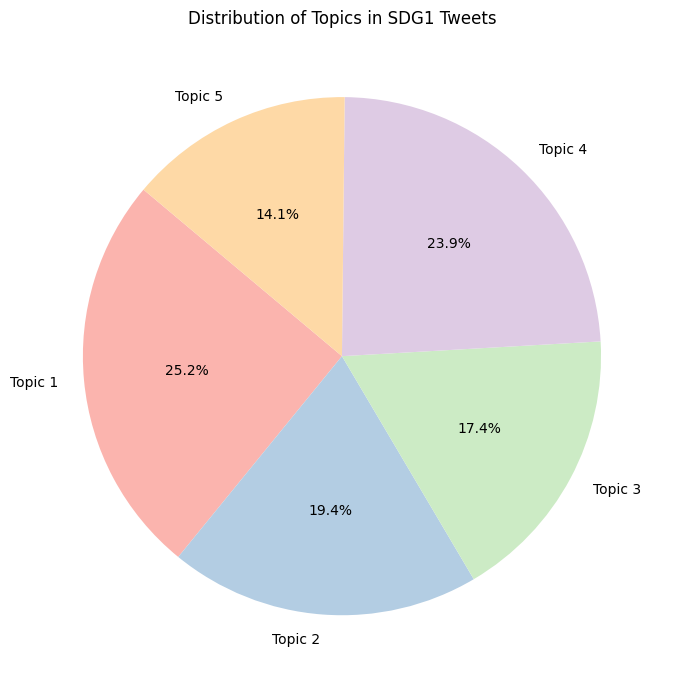

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the text data
text_data = df['no_stopwords'].dropna().astype(str)  # Ensure no NaNs and all text

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(text_data)

# Apply LDA with 5 topics
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(doc_term_matrix)

# Extract and print top 10 keywords per topic
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx+1}:")
        print(", ".join([words[i] for i in topic.argsort()[:-top_n - 1:-1]]))

print_topics(lda_model, vectorizer)

# Assign dominant topic to each tweet
topic_results = lda_model.transform(doc_term_matrix)
df['dominant_topic'] = topic_results.argmax(axis=1)

# Plot topic distribution (Pie chart)
topic_counts = df['dominant_topic'].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in topic_counts.index]

plt.figure(figsize=(7, 7))
plt.pie(topic_counts, labels=topic_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Distribution of Topics in SDG1 Tweets")
plt.tight_layout()
plt.show()


### Insight

The topic modeling results reinforce the narrative trends uncovered in earlier analyses. Each of the five topics captures a different facet of public discourse related to SDG 1 – No Poverty:

- **Topic 1** centers on *economic support for rural women*, training, and sustainable livelihoods.
- **Topic 2** focuses on *social protection and financial inclusion*, echoing frequently occurring bigrams like "social protection" and "basic income".
- **Topic 3** deals with *basic rights*, "land rights", and equitable access to "living wage", which aligns with earlier peaks in bigram and trigram analyses.
- **Topic 4** reflects concern for *homelessness and safety nets*, which matches the surge in sentiment-laden tweets during mid-April.
- **Topic 5** emphasizes *aid delivery and education*, resonating with recurring terms like "cash transfers" and "food aid".

These topics are not isolated; they **validate and connect** insights from previous tasks. For instance:
- In **Task 1**, frequent phrases like "basic income", "social protection", and "job training" are central to **Topics 2 and 3**.
- In **Task 2**, the April 17–22 tweet surge introduced new phrases such as "advisor economic empowerment" and "world bank", which align with **Topic 1 and Topic 4**.
- **Sentiment analysis (Task 3)** shows a dominance of positive sentiments during that peak, consistent with **Topic 5’s themes** of support and aid.

The alignment between earlier surface-level text patterns and deeper semantic themes from LDA highlights that **public discourse is both timely and ideologically consistent**. These results suggest that discussions around poverty are increasingly driven by **equity, access, and structural support systems**, often triggered by real-world events like international aid campaigns or economic crises.



## Task 5: Generative AI-Based Thematic Classification using Zero-Shot Learning

###Technique Overview
In this task, a **zero-shot text classification model** (`facebook/bart-large-mnli`) from Hugging Face’s Transformers library was applied to identify the most relevant **SDG-related theme** from tweet texts. This model does not require training on labeled data and is capable of generalizing to new topics, making it ideal for SDG applications.

The following candidate themes were provided:
- Financial inclusion, Education, Employment, Food security, Housing, Healthcare, Social protection, Climate impact, Policy change, Youth empowerment


In [ ]:
# Install and import the required library
!pip install -q transformers

from transformers import pipeline
import pandas as pd

# Initialize zero-shot classification pipeline using CPU
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=-1)  # Force CPU

# Define relevant SDG-related candidate labels
candidate_labels = [
    "financial inclusion",
    "education",
    "employment",
    "food security",
    "housing",
    "healthcare",
    "social protection",
    "climate impact",
    "policy change",
    "youth empowerment"
]

# Run classification on a small sample for speed
sampled_df = df['clean_text'].dropna().sample(30, random_state=42)

# Classify each tweet
results = []
for text in sampled_df:
    prediction = classifier(text, candidate_labels)
    results.append({
        'text': text,
        'top_label': prediction['labels'][0],
        'score': round(prediction['scores'][0], 4)
    })

# Convert to DataFrame
classified_df = pd.DataFrame(results)
classified_df.head(10)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


,text,top_label,score
0,how do you feel about student debt relief,education,0.7645
1,boost your income file your taxes for free you...,financial inclusion,0.6272
2,company earned what billion just to send celeb...,housing,0.5349
3,with that speed i doubt if its for the good of...,social protection,0.9662
4,the th poshan pakhwada has begun focusing on c...,policy change,0.6010
5,these cows out here grazing without consent th...,education,0.5339
6,visited street haven today a vital lifeline in...,social protection,0.6573
7,why minimum wage the equitybased argument the ...,social protection,0.7849
8,yearend giving makes a huge difference for my ...,housing,0.5164
9,did you know uttar pradesh contributes of bhar...,employment,0.2031


from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('top_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['top_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='score', y='top_label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### Insight from Zero-Shot Classification (Task 5)

By leveraging a **zero-shot classification model** (BART-based) to extract themes from SDG1-related tweets, this task revealed valuable patterns without relying on predefined training data. Using thematic labels such as *social protection*, *education*, *housing*, and *financial inclusion*, we classified each tweet based on its most relevant topic.

#### What the Model Found
The majority of tweets were associated with:
- **Social protection** — highlighting demands for safety nets, welfare systems, and equitable support.
- **Education** — particularly tied to student debt and youth development.
- **Housing** — reflecting concerns over basic shelter and urban inequality.
- **Financial inclusion** — emphasizing access to resources and services for marginalized groups.

These themes align closely with previous findings from **topic modeling** and **n-gram analysis**, where frequent terms included *basic income*, *student debt relief*, and *economic empowerment*. This triangulation across techniques reinforces that public discourse on poverty alleviation is deeply rooted in **institutional solutions and long-term stability**.

Unlike frequency-based techniques, zero-shot classification enables **semantic understanding** of each tweet. It shows not just what terms are used, but **why** — identifying the underlying concern or domain. For example:
- Tweets about *"minimum wage"* were linked to **social protection**.
- Posts discussing *"boost your income"* were mapped to **financial inclusion**.

This method surfaces **nuanced priorities** within the SDG1 conversation that are harder to detect through traditional NLP alone.
These results suggest that online discussions around poverty are **issue-focused** and policy-oriented.


